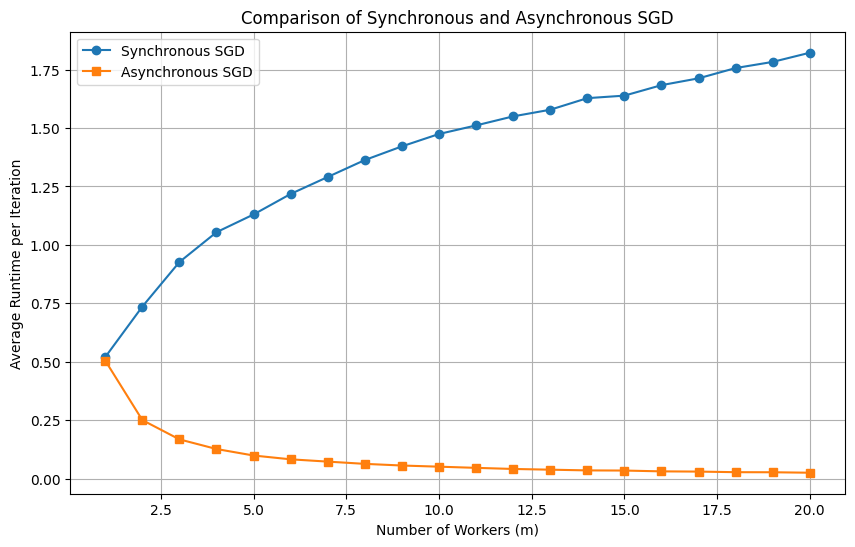

In [2]:
import numpy as np

import matplotlib.pyplot as plt

# Parameters
num_iterations = 5000
lambda_param = 2
m_values = range(1, 21)

# Function to simulate runtime for synchronous SGD
def simulate_synchronous_sgd(m, num_iterations, lambda_param):
    runtimes = []
    for _ in range(num_iterations):
        # Generate m exponential random variables for worker runtimes
        worker_times = np.random.exponential(1 / lambda_param, m)
        # Synchronous SGD runtime is determined by the slowest worker
        runtimes.append(np.max(worker_times))
    return np.mean(runtimes)

# Function to simulate runtime for asynchronous SGD
def simulate_asynchronous_sgd(m, num_iterations, lambda_param):
    runtimes = []
    for _ in range(num_iterations):
        # Generate m exponential random variables for worker runtimes
        worker_times = np.random.exponential(1 / lambda_param, m)
        # Asynchronous SGD runtime is determined by the fastest worker
        runtimes.append(np.min(worker_times))
    return np.mean(runtimes)

# Simulate and collect results
sync_runtimes = []
async_runtimes = []

for m in m_values:
    sync_runtimes.append(simulate_synchronous_sgd(m, num_iterations, lambda_param))
    async_runtimes.append(simulate_asynchronous_sgd(m, num_iterations, lambda_param))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(m_values, sync_runtimes, label="Synchronous SGD", marker='o')
plt.plot(m_values, async_runtimes, label="Asynchronous SGD", marker='s')
plt.xlabel("Number of Workers (m)")
plt.ylabel("Average Runtime per Iteration")
plt.title("Comparison of Synchronous and Asynchronous SGD")
plt.legend()
plt.grid()
plt.show()

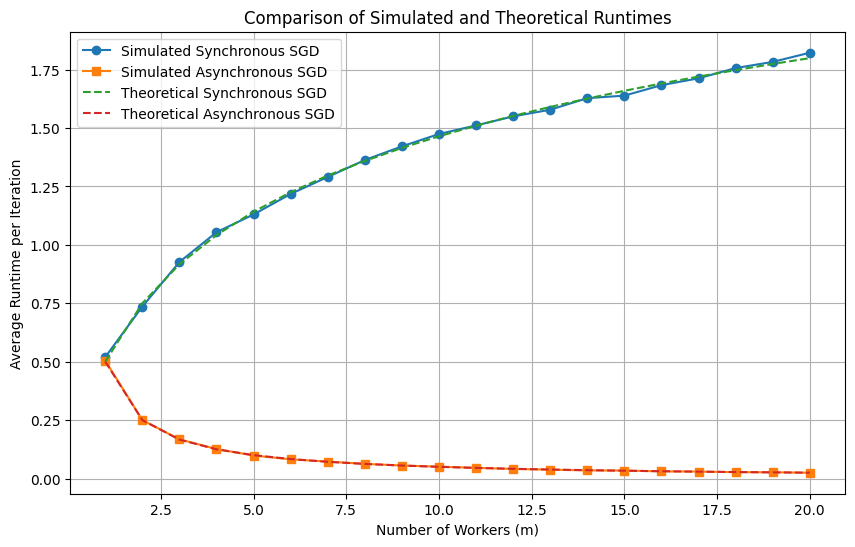

In [5]:
# Calculate theoretical expected runtimes
theoretical_sync_runtimes = [sum(1/k for k in range(1, m+1)) / lambda_param for m in m_values]
theoretical_async_runtimes = [1 / (lambda_param * m) for m in m_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(m_values, sync_runtimes, label="Simulated Synchronous SGD", marker='o')
plt.plot(m_values, async_runtimes, label="Simulated Asynchronous SGD", marker='s')
plt.plot(m_values, theoretical_sync_runtimes, label="Theoretical Synchronous SGD", linestyle='--')
plt.plot(m_values, theoretical_async_runtimes, label="Theoretical Asynchronous SGD", linestyle='--')
plt.xlabel("Number of Workers (m)")
plt.ylabel("Average Runtime per Iteration")
plt.title("Comparison of Simulated and Theoretical Runtimes")
plt.legend()
plt.grid()
plt.show()